In [1]:
import os

from collections import Counter

import json
import requests
from bs4 import BeautifulSoup as bs4

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

from googleapiclient.discovery import build

In [4]:
칸아카데미 = 'UC4a-Gbdw7vOaccHmFo40b9g'
쑥쑥 = 'UC_x5XG1OV2P6uZZ5FSM9Ttw'

with open('/home/sjt/space/github/data_analysis/data/유튜브정보/키.txt', 'r') as f:
    API_KEY = f.read()

channel_id = 칸아카데미

youtube = build('youtube', 'v3', developerKey=API_KEY)

In [5]:
request = youtube.playlists().list(
    part='snippet',
    channelId=channel_id,
    maxResults=50
)

response = request.execute()
response

{'kind': 'youtube#playlistListResponse',
 'etag': '5mMOePZiM1xSCaiiU3FC5QWCl_c',
 'nextPageToken': 'CDIQAA',
 'pageInfo': {'totalResults': 536, 'resultsPerPage': 50},
 'items': [{'kind': 'youtube#playlist',
   'etag': 'jWRVqCifuPzNZ5GmmcG_ufk60RI',
   'id': 'PLSQl0a2vh4HD2AZcy7Pe8mHAiO5UG2WKt',
   'snippet': {'publishedAt': '2024-06-12T22:22:37Z',
    'channelId': 'UC4a-Gbdw7vOaccHmFo40b9g',
    'title': 'Electromagnetic radiation',
    'description': '',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/Je_f4RimfKI/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/Je_f4RimfKI/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.com/vi/Je_f4RimfKI/hqdefault.jpg',
      'width': 480,
      'height': 360},
     'standard': {'url': 'https://i.ytimg.com/vi/Je_f4RimfKI/sddefault.jpg',
      'width': 640,
      'height': 480},
     'maxres': {'url': 'https://i.ytimg.com/vi/Je_f4RimfKI/m

In [7]:
request = youtube.playlists().list(
    part='snippet',
    channelId=channel_id,
    maxResults=50,
    pageToken='CDIQAA'
)

response = request.execute()
response

{'kind': 'youtube#playlistListResponse',
 'etag': 'za4NLg0czoIdPcSqn4Wy-7em5Uk',
 'nextPageToken': 'CGQQAA',
 'prevPageToken': 'CDIQAQ',
 'pageInfo': {'totalResults': 536, 'resultsPerPage': 50},
 'items': [{'kind': 'youtube#playlist',
   'etag': 'fgIt7Qcs1PxtJOApgpIrl4OG-lI',
   'id': 'PLSQl0a2vh4HCbPTP6mL7phF0DPxXWv3kr',
   'snippet': {'publishedAt': '2018-10-30T21:33:15Z',
    'channelId': 'UC4a-Gbdw7vOaccHmFo40b9g',
    'title': 'Political participation | US government and civics | Khan Academy',
    'description': '',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/sQcwHXgmR8M/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/sQcwHXgmR8M/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.com/vi/sQcwHXgmR8M/hqdefault.jpg',
      'width': 480,
      'height': 360},
     'standard': {'url': 'https://i.ytimg.com/vi/sQcwHXgmR8M/sddefault.jpg',
      'width': 640,
      'height'

In [23]:
request = youtube.search().list(
    part='snippet',
    channelId=channel_id,
    type='video',
    maxResults=50
)

response = request.execute()
response

{'kind': 'youtube#searchListResponse',
 'etag': 't_t0EtdZvtLe51PJyysGhkRXCJ8',
 'nextPageToken': 'CDIQAA',
 'regionCode': 'KR',
 'pageInfo': {'totalResults': 1000000, 'resultsPerPage': 50},
 'items': [{'kind': 'youtube#searchResult',
   'etag': 'uDtnWMhSkePcpduJQPie44H3Klg',
   'id': {'kind': 'youtube#video', 'videoId': 'XIsPC-f2e2c'},
   'snippet': {'publishedAt': '2015-06-18T21:54:43Z',
    'channelId': 'UC4a-Gbdw7vOaccHmFo40b9g',
    'title': 'Inferring limit from numerical data | Limits | Differential Calculus | Khan Academy',
    'description': 'Watch the next lesson: ...',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/XIsPC-f2e2c/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/XIsPC-f2e2c/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.com/vi/XIsPC-f2e2c/hqdefault.jpg',
      'width': 480,
      'height': 360}},
    'channelTitle': 'Khan Academy',
    'liveBroadca

In [24]:
type(response)

dict

In [25]:
response

{'kind': 'youtube#searchListResponse',
 'etag': 't_t0EtdZvtLe51PJyysGhkRXCJ8',
 'nextPageToken': 'CDIQAA',
 'regionCode': 'KR',
 'pageInfo': {'totalResults': 1000000, 'resultsPerPage': 50},
 'items': [{'kind': 'youtube#searchResult',
   'etag': 'uDtnWMhSkePcpduJQPie44H3Klg',
   'id': {'kind': 'youtube#video', 'videoId': 'XIsPC-f2e2c'},
   'snippet': {'publishedAt': '2015-06-18T21:54:43Z',
    'channelId': 'UC4a-Gbdw7vOaccHmFo40b9g',
    'title': 'Inferring limit from numerical data | Limits | Differential Calculus | Khan Academy',
    'description': 'Watch the next lesson: ...',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/XIsPC-f2e2c/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/XIsPC-f2e2c/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.com/vi/XIsPC-f2e2c/hqdefault.jpg',
      'width': 480,
      'height': 360}},
    'channelTitle': 'Khan Academy',
    'liveBroadca

In [30]:
비디오아이디들 = [i['id']['videoId'] for i in response['items']]
비디오아이디들 = ','.join(비디오아이디들)
비디오아이디들

'XIsPC-f2e2c,KyYC8XzKsHU,vmS3cTaxKdA,dawGZs4TaTU,GQXUpB2NHvQ,cRboY08YG8g,_bBAiZhfH_4,nGCW5teACC0,jGeyBOTGp9g,jG4WLAit7Lo,BfJxKKGl8lg,ZqB-Sp7Zi6E,lkQT8zb0_A8,tiaFqgbq1hM,KsiWTrZQFXg,rJCRGiEidZ4,FadvtbvAoWk,UASWxKWdKCw,q0bQrGhdPm4,Yn7ICU3Q4mE,SOLnbKI73Wo,mfrDtmzmRk4,7o1wX-jEnP8,276Djs2h18Y,NMG8sR_1YTI,xYAdMDT2IyE,WUoCSkSW4cs,52RHZdBSjTw,OnBXX4ooiuY,N-oyB_UYZ74,M_VZsGHfpvw,5LeZflr8Zfs,y-FlANhhNiA,DHG61XPuWyk,HW__or3B9pw,p7pJMvD2sag,m5WRTjjmJzE,7Gc4wAQZcfA,JC82Il2cjqA,sMOZf4GN3oc,GxKWCiZHsvo,UK2shgCXALo,IelS2vg7JO8,b2C9I8HuCe4,g3LrOw1JMi8,7QMoNY6FzvM,O1-9f1g0OsI,qv7DM5Ph0vU,Dpo_-GrMpNE,wh0OS4MrN3E'

In [35]:
videos_requests = youtube.videos().list(
    part='snippet,contentDetails,status,statistics,topicDetails',
    id = 비디오아이디들,
    maxResults=50
)

videos_response = videos_requests.execute()
videos_response

{'kind': 'youtube#videoListResponse',
 'etag': 'znmDtaPTOnj_vwFdjfDhYWTPAD4',
 'items': [{'kind': 'youtube#video',
   'etag': 'PHI03CCWh95_WalMfy1P-f9u8vg',
   'id': 'XIsPC-f2e2c',
   'snippet': {'publishedAt': '2015-06-18T21:54:43Z',
    'channelId': 'UC4a-Gbdw7vOaccHmFo40b9g',
    'title': 'Inferring limit from numerical data | Limits | Differential Calculus | Khan Academy',
    'description': "Watch the next lesson: https://www.khanacademy.org/math/differential-calculus/limits_topic/limits_tutorial/v/numerically-estimating-limit?utm_source=YT&utm_medium=Desc&utm_campaign=DifferentialCalculus\n\nMissed the previous lesson? \nhttps://www.khanacademy.org/math/differential-calculus/limits_topic/limits_tutorial/v/introduction-to-limits-hd?utm_source=YT&utm_medium=Desc&utm_campaign=DifferentialCalculus\n\nDifferential calculus on Khan Academy: Limit introduction, squeeze theorem, and epsilon-delta definition of limits.\n\nAbout Khan Academy: Khan Academy offers practice exercises, instruc

In [37]:
videos_response['items'][0]

{'kind': 'youtube#video',
 'etag': 'PHI03CCWh95_WalMfy1P-f9u8vg',
 'id': 'XIsPC-f2e2c',
 'snippet': {'publishedAt': '2015-06-18T21:54:43Z',
  'channelId': 'UC4a-Gbdw7vOaccHmFo40b9g',
  'title': 'Inferring limit from numerical data | Limits | Differential Calculus | Khan Academy',
  'description': "Watch the next lesson: https://www.khanacademy.org/math/differential-calculus/limits_topic/limits_tutorial/v/numerically-estimating-limit?utm_source=YT&utm_medium=Desc&utm_campaign=DifferentialCalculus\n\nMissed the previous lesson? \nhttps://www.khanacademy.org/math/differential-calculus/limits_topic/limits_tutorial/v/introduction-to-limits-hd?utm_source=YT&utm_medium=Desc&utm_campaign=DifferentialCalculus\n\nDifferential calculus on Khan Academy: Limit introduction, squeeze theorem, and epsilon-delta definition of limits.\n\nAbout Khan Academy: Khan Academy offers practice exercises, instructional videos, and a personalized learning dashboard that empower learners to study at their own pace

In [39]:
[i['snippet']['title'] + '_viewCount : ' + i['statistics']['viewCount'] for i in videos_response['items']]

['Inferring limit from numerical data | Limits | Differential Calculus | Khan Academy_viewCount : 587189',
 'Worked example: Evaluating derivative with implicit differentiation | AP Calculus AB | Khan Academy_viewCount : 307331',
 'Generalizing disc method around x-axis | AP Calculus AB | Khan Academy_viewCount : 192112',
 'Super Yoga plans: Solving systems by substitution | Linear equations | Algebra I | Khan Academy_viewCount : 81500',
 'Equation for a circle using the Pythagorean Theorem | Circles | Geometry | Khan Academy_viewCount : 260483',
 'Optimization: box volume (Part 2) | Applications of derivatives | AP Calculus AB | Khan Academy_viewCount : 297088',
 'Limit and function defined at point of discontinuity | Limits | Differential Calculus | Khan Academy_viewCount : 214505',
 'Tangent slope as limiting value of secant slope example 1 | Differential Calculus | Khan Academy_viewCount : 205588',
 'Describing populations | Ecology and natural systems | High school biology | Khan 

In [40]:
pd.Data([(i['snippet']['title'],i['statistics']['viewCount']) for i in videos_response['items']])

[('Inferring limit from numerical data | Limits | Differential Calculus | Khan Academy',
  '587189'),
 ('Worked example: Evaluating derivative with implicit differentiation | AP Calculus AB | Khan Academy',
  '307331'),
 ('Generalizing disc method around x-axis | AP Calculus AB | Khan Academy',
  '192112'),
 ('Super Yoga plans: Solving systems by substitution | Linear equations | Algebra I | Khan Academy',
  '81500'),
 ('Equation for a circle using the Pythagorean Theorem | Circles | Geometry | Khan Academy',
  '260483'),
 ('Optimization: box volume (Part 2) | Applications of derivatives | AP Calculus AB | Khan Academy',
  '297088'),
 ('Limit and function defined at point of discontinuity | Limits | Differential Calculus | Khan Academy',
  '214505'),
 ('Tangent slope as limiting value of secant slope example 1 | Differential Calculus | Khan Academy',
  '205588'),
 ('Describing populations | Ecology and natural systems | High school biology | Khan Academy',
  '2338'),
 ('Modules program

In [47]:
df_khanAcademy = pd.DataFrame([(i['snippet']['title'],int(i['statistics']['viewCount'])) for i in videos_response['items']], columns=['title','viewCount'])
df_khanAcademy.head()

,title,viewCount
0,Inferring limit from numerical data | Limits |...,587189
1,Worked example: Evaluating derivative with imp...,307331
2,Generalizing disc method around x-axis | AP Ca...,192112
3,Super Yoga plans: Solving systems by substitut...,81500
4,Equation for a circle using the Pythagorean Th...,260483


In [49]:
df_khanAcademy.sort_values('viewCount')[-10:]

,title,viewCount
47,Introduction to improper integrals | AP Calcul...,558895
0,Inferring limit from numerical data | Limits |...,587189
41,Inflection points introduction | AP Calculus A...,594463
48,Natural logarithm with a calculator | Logarith...,596203
49,The Growth Mindset,670255
42,"Volume of a sphere | Perimeter, area, and volu...",724459
39,The Caesar cipher | Journey into cryptography ...,762518
45,Graphing a parabola in vertex form | Quadratic...,1127734
43,Box and whisker plot | Descriptive statistics ...,1353576
38,You Can Learn Anything,8081409


<Axes: >

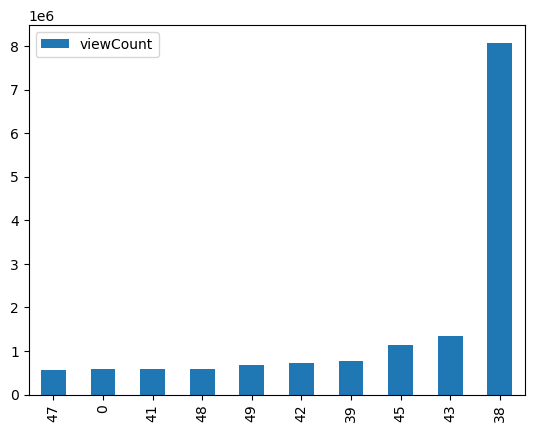

In [50]:
df_khanAcademy.sort_values('viewCount')[-10:].plot.bar()

In [27]:
response['items'][1]

{'kind': 'youtube#searchResult',
 'etag': 'QMqe2s3wpQ-VAZOlj5405bPgAnA',
 'id': {'kind': 'youtube#video', 'videoId': 'KyYC8XzKsHU'},
 'snippet': {'publishedAt': '2013-01-30T19:09:04Z',
  'channelId': 'UC4a-Gbdw7vOaccHmFo40b9g',
  'title': 'Worked example: Evaluating derivative with implicit differentiation | AP Calculus AB | Khan Academy',
  'description': 'Courses on Khan Academy are always 100% free. Start practicing—and saving your progress—now: ...',
  'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/KyYC8XzKsHU/default.jpg',
    'width': 120,
    'height': 90},
   'medium': {'url': 'https://i.ytimg.com/vi/KyYC8XzKsHU/mqdefault.jpg',
    'width': 320,
    'height': 180},
   'high': {'url': 'https://i.ytimg.com/vi/KyYC8XzKsHU/hqdefault.jpg',
    'width': 480,
    'height': 360}},
  'channelTitle': 'Khan Academy',
  'liveBroadcastContent': 'none',
  'publishTime': '2013-01-30T19:09:04Z'}}

In [8]:
response['items'][0]['snippet']['title']

'The Caesar cipher | Journey into cryptography | Computer Science | Khan Academy'

In [9]:
[i['snippet']['title'] for i in response['items']]

['The Caesar cipher | Journey into cryptography | Computer Science | Khan Academy',
 'You Can Learn Anything',
 'Inflection points introduction | AP Calculus AB | Khan Academy',
 'Volume of a sphere | Perimeter, area, and volume | Geometry | Khan Academy',
 'Box and whisker plot | Descriptive statistics | Probability and Statistics | Khan Academy',
 'Introduction to improper integrals | AP Calculus BC | Khan Academy',
 'Defined and undefined matrix operations | Matrices | Precalculus | Khan Academy',
 'Graphing a parabola in vertex form | Quadratic equations | Algebra I | Khan Academy',
 'Natural logarithm with a calculator | Logarithms | Algebra II | Khan Academy',
 'Domain and range of a relation | Functions and their graphs | Algebra II | Khan Academy',
 'Law of cosines | Trig identities and examples | Trigonometry | Khan Academy',
 'The Growth Mindset',
 'Introduction to complex numbers | Imaginary and complex numbers | Precalculus | Khan Academy',
 'Focus and directrix introductio

In [10]:
[i['snippet']['description'] for i in response['items']]

['Courses on Khan Academy are always 100% free. Start practicing—and saving your progress—now: ...',
 "Khan Academy is on a mission to unlock the world's potential. Most people think their intelligence is fixed. The science says it's not ...",
 'Courses on Khan Academy are always 100% free. Start practicing—and saving your progress—now: ...',
 'Courses on Khan Academy are always 100% free. Start practicing—and saving your progress—now: ...',
 'Courses on Khan Academy are always 100% free. Start practicing—and saving your progress—now: ...',
 'Courses on Khan Academy are always 100% free. Start practicing—and saving your progress—now: ...',
 'Courses on Khan Academy are always 100% free. Start practicing—and saving your progress—now: ...',
 'Courses on Khan Academy are always 100% free. Start practicing—and saving your progress—now: ...',
 'Courses on Khan Academy are always 100% free. Start practicing—and saving your progress—now: ...',
 'Domain and Range of a Relation Practice this le

In [8]:
response

{'kind': 'youtube#searchListResponse',
 'etag': '1cJ3PEMg5x1nRpvW7a1D1o1bM70',
 'nextPageToken': 'CAUQAA',
 'regionCode': 'KR',
 'pageInfo': {'totalResults': 13, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#searchResult',
   'etag': '0tHssInlj_CYCOttrq5RJpo-J28',
   'id': {'kind': 'youtube#channel', 'channelId': 'UC3egV8AyVrnwUEOkGZB-s2Q'},
   'snippet': {'publishedAt': '2024-05-14T08:05:00Z',
    'channelId': 'UC3egV8AyVrnwUEOkGZB-s2Q',
    'title': '쑥쑥 SsookSsook',
    'description': '양세찬도 유튜브를 하나 싶겠지만 아직하는건아니고뭐하고싶긴해서일단회의는하는데 아직뭐해야할지몰라서회의하는거라도기록 ...',
    'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/YLgysRDEWLAdXXW8bvrUP1jqhUBDCBn6uIFC4d_plPNbQJVWv5LKyDxVNRCGEjvcHEgIk2_3Cw=s88-c-k-c0xffffffff-no-rj-mo'},
     'medium': {'url': 'https://yt3.ggpht.com/YLgysRDEWLAdXXW8bvrUP1jqhUBDCBn6uIFC4d_plPNbQJVWv5LKyDxVNRCGEjvcHEgIk2_3Cw=s240-c-k-c0xffffffff-no-rj-mo'},
     'high': {'url': 'https://yt3.ggpht.com/YLgysRDEWLAdXXW8bvrUP1jqhUBDCBn6uIFC4d_plPNbQJVWv5LKyDxVNRCGEjvcHEgI